### Testing

In [1]:
import pandas as pd

In [2]:
a=pd.read_csv('wiki_prices.csv')

In [3]:
a.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0


In [4]:


# Assuming your dataset is stored in a pandas DataFrame called 'df'
a['date'] = pd.to_datetime(a['date'])  # Convert 'date' column to datetime type
min_year = a['date'].dt.year.min()  # Get the minimum year
max_year = a['date'].dt.year.max()  # Get the maximum year

print("Year Range:", min_year, "-", max_year)


Year Range: 1962 - 2018


### Downloading S&P data from yfinance

In [13]:
import pandas as pd
import yfinance as yf
import wikipedia as wp

# Scrape the table from the S&P 500 Wikipedia page
html = wp.page("List of S&P 500 companies").html().encode("UTF-8")
df = pd.read_html(html)[0]

# Extract the ticker symbols from the table
tickers = df['Symbol'].tolist()

# Retrieve historical data for each ticker symbol
start_date = "2018-01-01"
end_date = "2023-05-31"
data = yf.download(tickers, start=start_date, end=end_date)

# Print the first few rows of the data for one of the tickers
print(data['Close'][tickers[0]].head())


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
Date
2018-01-02 00:00:00    235.639999
2018-01-03 00:00:00    235.630005
2018-01-04 00:00:00    238.710007
2018-01-05 00:00:00    240.570007
2018-01-08 00:00:00    239.789993
Name: MMM, dtype: float64


In [40]:
snp=data
snp

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2018-01-02   64.989258  51.647556   98.501457   40.831581   76.580688   
2018-01-03   66.642822  51.014030   99.392807   40.824482   77.779068   
2018-01-04   66.142914  51.335667  103.060249   41.014114   77.335503   
2018-01-05   67.200424  51.316177  104.155846   41.481060   78.681770   
2018-01-08   67.344635  50.809345  103.422356   41.327000   77.421120   
...                ...        ...         ...         ...         ...   
2023-05-23  128.639999  14.070000  116.779999  171.559998  142.520004   
2023-05-24  120.989998  13.800000  115.230003  171.839996  141.149994   
2023-05-25  119.489998  14.380000  111.620003  172.990005  138.619995   
2023-05-26  120.419998  14.350000  112.150002  175.429993  137.559998   
2023-05-30  117.730003  14.620000  112.199997  177.300003  136.440002   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2018-01-02   86.158249   53.636829  29.433332  141.986435  177.699997  ...   
2018-01-03   86.478920   53.755440  29.459999  142.641693  181.039993  ...   
2018-01-04   86.286507   53.664204  29.570000  144.330750  183.220001  ...   
2018-01-05   87.330940   53.819309  29.453333  145.521317  185.339996  ...   
2018-01-08   88.778542   53.664204  29.456667  146.684204  185.039993  ...   
...                ...         ...        ...         ...         ...  ...   
2023-05-23  171.259995  105.739998  73.169998  288.100006  370.420013  ...   
2023-05-24  171.059998  104.040001  71.769997  286.820007  365.760010  ...   
2023-05-25  170.169998  102.139999  72.379997  291.760010  392.059998  ...   
2023-05-26  168.410004  102.870003  71.000000  303.600006  415.390015  ...   
2023-05-30  166.009995  101.709999  71.199997  308.429993  417.209991  ...   

             Volume                                                          \
               WYNN      XEL       XOM     XRAY       XYL      YUM      ZBH   
Date                                                                          
2018-01-02  2581200  2443400  11469300  1622300    877800  1747800  1818259   
2018-01-03  3530900  4114900  13957700  1533300    778800  2554900  1368664   
2018-01-04  2708800  2807000  10863000  1052400    796500  1971200  1105396   
2018-01-05  2186600  3728000  11047600  1329000    666800  1927100  1095302   
2018-01-08  1803800  3837600  10927100  1188500    554700  1599400  1286985   
...             ...      ...       ...      ...       ...      ...      ...   
2023-05-23  3877500  3966300  14394400  2093900  11602900  1828300  1153700   
2023-05-24  2342700  3562000  16340300  1555000   4165600  1352200  1169000   
2023-05-25  1834800  3706100  14316500  1440800  20241700  2364400  1390400   
2023-05-26  1808200  2954000  12370300  1655800   4632700  2145000  1354300   
2023-05-30  3623400  2339800  11938000  1788800   3668600  1843100  1234200   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2018-01-02  310600  2387100  2135600  
2018-01-03  253000  1575700  2328200  
2018-01-04  435200  3309200  2534000  
2018-01-05  301800  1212200  2166100  
2018-01-08  218600  1697700  3631400  
...            ...      ...      ...  
2023-05-23  359600  9434400  2301700  
2023-05-24  467500  5329200  2437900  
2023-05-25  356700  5220900  3626300  
2023-05-26  243500  3016400  1909400  
2023-05-30  271000  4164100  2185000  

[1361 rows x 3018 columns]

In [41]:
returns = snp['Adj Close'].pct_change()


In [42]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [44]:
returns.to_csv('s&preturns.csv',index=True)

In [97]:
snp_ret = pd.read_csv('s&preturns.csv',index_col='Date')
snp_ret.index=pd.to_datetime(snp_ret.index)

In [98]:
snp_ret

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


### Processing forex data

In [7]:
start_year = 2018
end_year = 2023

# Create an empty DataFrame with the desired date range
date_range = pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-12-31", freq='D')
Forex = pd.DataFrame(index=date_range)
Forex=Forex[:-199]
Forex

""
2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
...
2023-06-11
2023-06-12
2023-06-13
2023-06-14


In [8]:
address_list = ['/home/mehedi/Documents/PCA/Data/Forex/AUDCAD_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/AUDCHF_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/AUDJPY_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/AUDUSD_Daily_201801020000_202306010000.csv','/home/mehedi/Documents/PCA/Data/Forex/CADCHF_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/CADJPY_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/CHFJPY_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/EURAUD_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/EURCAD_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/EURCHF_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/EURGBP_Daily_201801020000_202306010000.csv','/home/mehedi/Documents/PCA/Data/Forex/EURJPY_Daily_201801020000_202306010000.csv','/home/mehedi/Documents/PCA/Data/Forex/EURNZD_Daily_201801020000_202306020000.csv','/home/mehedi/Documents/PCA/Data/Forex/EURUSD_Daily_201801020000_202306010000.csv','/home/mehedi/Documents/PCA/Data/Forex/GBPJPY_Daily_201801020000_202306010000.csv','/home/mehedi/Documents/PCA/Data/Forex/USDCAD_Daily_201801020000_202306010000.csv','/home/mehedi/Documents/PCA/Data/Forex/USDJPY_Daily_201801020000_202306010000.csv']

In [9]:
import os
forex_list = [os.path.basename(path).split('_')[0] for path in address_list]
print(forex_list)

['AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDUSD', 'CADCHF', 'CADJPY', 'CHFJPY', 'EURAUD', 'EURCAD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURNZD', 'EURUSD', 'GBPJPY', 'USDCAD', 'USDJPY']


In [10]:
for x,y in zip(address_list,forex_list):
    a=pd.read_csv(x,index_col=0,delimiter='\t')
    a.index=pd.to_datetime(a.index)
    a['pctchng']=a['<CLOSE>'].pct_change()
    Forex = pd.merge(Forex, a['pctchng'], left_index=True, right_index=True, how='left')
    Forex.rename(columns={'pctchng': y}, inplace=True)

In [11]:
Forex

,AUDCAD,AUDCHF,AUDJPY,AUDUSD,CADCHF,CADJPY,CHFJPY,EURAUD,EURCAD,EURCHF,EURGBP,EURJPY,EURNZD,EURUSD,GBPJPY,USDCAD,USDJPY
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002890,0.006180,0.003004,0.001073,0.003168,0.000033,-0.003964,-0.004073,-0.001710,0.002126,0.001759,-0.001581,-0.001238,-0.003624,-0.003559,0.001998,0.002102
2018-01-04,-0.000356,0.001660,0.005502,0.003434,0.000347,0.005873,0.005300,0.000776,0.000551,0.000562,0.001845,0.006652,-0.004486,0.004461,0.004769,-0.003917,0.001991
2018-01-05,-0.005827,-0.000639,0.002956,0.000216,0.007712,0.008885,0.002507,-0.002875,-0.009590,-0.001635,-0.003898,-0.000184,-0.006031,-0.003149,0.004347,-0.006247,0.002963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Processing Marco Variables

In [89]:
column_names = ['date', 'value']
T_bill = pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/1-year-treasury-rate-yield-chart.csv',index_col=0)
T_bill=T_bill[:-21]
T_bill.index=pd.to_datetime(T_bill.index)


In [90]:
start_year = pd.to_datetime('2018').year
end_year = pd.to_datetime('2023').year
T_bill = T_bill.loc[(T_bill.index.year >= start_year) & (T_bill.index.year <= end_year)]
T_bill

,value
date,
2018-01-02,1.83
2018-01-03,1.81
2018-01-04,1.82
2018-01-05,1.80
2018-01-08,1.79
...,...
2023-06-09,5.17
2023-06-12,5.18
2023-06-13,5.26


In [91]:
T_bill['US_Treasury_Bill'] = T_bill[' value'].pct_change()

In [92]:
T_bill

,value,US_Treasury_Bill
date,,
2018-01-02,1.83,NaN
2018-01-03,1.81,-0.010929
2018-01-04,1.82,0.005525
2018-01-05,1.80,-0.010989
2018-01-08,1.79,-0.005556
...,...,...
2023-06-09,5.17,0.009766
2023-06-12,5.18,0.001934
2023-06-13,5.26,0.015444


In [93]:
T_bill_return = pd.DataFrame(T_bill['US_Treasury_Bill'],index=T_bill.index)

In [94]:
T_bill_return.to_csv('/home/mehedi/Documents/PCA/Data/macro var/TreasuryBillReturn.csv',index=True)

In [95]:
T=pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/TreasuryBillReturn.csv',index_col=0)
T

,US_Treasury_Bill
date,
2018-01-02,NaN
2018-01-03,-0.010929
2018-01-04,0.005525
2018-01-05,-0.010989
2018-01-08,-0.005556
...,...
2023-06-09,0.009766
2023-06-12,0.001934
2023-06-13,0.015444


In [96]:
US_interest = pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/fed-funds-rate-historical-chart.csv',index_col=0)
US_interest=US_interest[:-21]
US_interest.index=pd.to_datetime(US_interest.index)
US_interest = US_interest.loc[(US_interest.index.year >= start_year) & (US_interest.index.year <= end_year)]
US_interest

,value
date,
2018-01-02,1.42
2018-01-03,1.42
2018-01-04,1.42
2018-01-05,1.42
2018-01-06,1.42
...,...
2023-06-09,5.08
2023-06-12,5.08
2023-06-13,5.08


In [99]:
US_interest['US_Interest_Rate_Return'] = US_interest[' value'].pct_change()
US_interest

,value,US_Interest_Rate_Return
date,,
2018-01-02,1.42,NaN
2018-01-03,1.42,0.000000
2018-01-04,1.42,0.000000
2018-01-05,1.42,0.000000
2018-01-06,1.42,0.000000
...,...,...
2023-06-09,5.08,0.000000
2023-06-12,5.08,0.000000
2023-06-13,5.08,0.000000


In [102]:
US_intRate_chng = pd.DataFrame(US_interest['US_Interest_Rate_Return'],index=US_interest.index)
US_intRate_chng.to_csv('/home/mehedi/Documents/PCA/Data/macro var/US_interestRate_Return.csv',index=True)

In [104]:
int_rate=pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/US_interestRate_Return.csv',index_col=0)
int_rate

,US_Interest_Rate_Return
date,
2018-01-02,NaN
2018-01-03,0.000000
2018-01-04,0.000000
2018-01-05,0.000000
2018-01-06,0.000000
...,...
2023-06-09,0.000000
2023-06-12,0.000000
2023-06-13,0.000000


In [219]:
inflation = pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/united-states-inflation-rate-cpi.csv',index_col=0)
inflation.index=pd.to_datetime(inflation.index)
end_year = pd.to_datetime('2021').year
inflation = inflation.loc[(inflation.index.year >= start_year) & (inflation.index.year <= end_year)]
inflation = inflation.drop(' Annual Change', axis=1)
inflation = inflation.drop(' ', axis=1)

inflation

,Inflation Rate (%)
date,
2018-12-31,2.4426
2019-12-31,1.8122
2020-12-31,1.2336
2021-12-31,4.6979


In [220]:
import numpy as np
new_row = pd.DataFrame({' Inflation Rate (%)': [8.0, 4.0],
                        },
                       index=pd.to_datetime(['2022-12-31', '2023-05-01']))


In [221]:
new_row

,Inflation Rate (%)
2022-12-31,8.0
2023-05-01,4.0


In [222]:
inflation = pd.concat([inflation, new_row],axis=0)
inflation.index= pd.to_datetime(inflation.index)
inflation

,Inflation Rate (%)
2018-12-31,2.4426
2019-12-31,1.8122
2020-12-31,1.2336
2021-12-31,4.6979
2022-12-31,8.0000
2023-05-01,4.0000


In [225]:
new_index = pd.date_range(start='2018-01-01', end='2023-06-15', freq='D')
df_reindexed = inflation.reindex(new_index, method='bfill')
df_reindexed[' Inflation Rate (%)'].fillna(method='ffill', inplace=True)

In [227]:
df_reindexed['US_inflation_return']=df_reindexed[' Inflation Rate (%)'].pct_change()
US_inflation_return =pd.DataFrame(df_reindexed['US_inflation_return'],index=df_reindexed.index)
US_inflation_return

,US_inflation_return
2018-01-01,NaN
2018-01-02,0.0
2018-01-03,0.0
2018-01-04,0.0
2018-01-05,0.0
...,...
2023-06-11,0.0
2023-06-12,0.0
2023-06-13,0.0
2023-06-14,0.0


In [230]:
US_inflation_return['2021-12-28':'2022-01-15']

,US_inflation_return
2021-12-28,0.000000
2021-12-29,0.000000
2021-12-30,0.000000
2021-12-31,0.000000
2022-01-01,0.702889
2022-01-02,0.000000
2022-01-03,0.000000
2022-01-04,0.000000
2022-01-05,0.000000
2022-01-06,0.000000


In [231]:
US_inflation_return.to_csv('/home/mehedi/Documents/PCA/Data/macro var/US_inflation_return.csv',index=True)
us_ifls= pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/US_inflation_return.csv',index_col=0)
us_ifls

,US_inflation_return
2018-01-01,NaN
2018-01-02,0.0
2018-01-03,0.0
2018-01-04,0.0
2018-01-05,0.0
...,...
2023-06-11,0.0
2023-06-12,0.0
2023-06-13,0.0
2023-06-14,0.0


In [232]:
Macro_var = pd.concat([T_bill_return,US_intRate_chng,US_inflation_return],axis=1)

In [234]:
Macro_var['2021-12-28':'2022-01-05']

,US_Treasury_Bill,US_Interest_Rate_Return,US_inflation_return
2021-12-28,0.181818,0.000000,0.000000
2021-12-29,-0.025641,0.000000,0.000000
2021-12-30,0.000000,0.000000,0.000000
2021-12-31,0.026316,-0.125000,0.000000
2022-01-01,NaN,NaN,0.702889
2022-01-02,NaN,NaN,0.000000
2022-01-03,0.025641,0.142857,0.000000
2022-01-04,-0.050000,0.000000,0.000000
2022-01-05,0.078947,0.000000,0.000000


In [235]:
Macro_var.to_csv('/home/mehedi/Documents/PCA/Data/macro var/Macro_variable_return.csv',index=True)

In [104]:
M=pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/Macro_variable_return.csv',index_col=0)
M

,US_Treasury_Bill,US_Interest_Rate_Return,US_inflation_return
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,0.0
2018-01-03,-0.010929,0.000000,0.0
2018-01-04,0.005525,0.000000,0.0
2018-01-05,-0.010989,0.000000,0.0
...,...,...,...
2023-06-11,NaN,NaN,0.0
2023-06-12,0.001934,0.000000,0.0
2023-06-13,0.015444,0.000000,0.0
2023-06-14,0.001901,0.000000,0.0


### Processing Commodities data

In [3]:
a=pd.read_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Bursa Malaysia/USD Malaysian Crude Palm Oil/April19.csv', index_col=0)
# a.index=pd.to_datetime(a.index)
# a.Close[-1]

In [57]:
a.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [83]:
import os
import pandas as pd

# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Bursa Malaysia/USD Malaysian Crude Palm Oil"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'Malaysian_crude_oil'}, inplace=True)

Malaysian_crude_oil = combined_df

Malaysian_crude_oil.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Bursa Malaysia/USD Malaysian Crude Palm Oil/combined_price.csv',index=False)


In [82]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Japan (TOCOM+OSE)/Jpx_Dubai_Crudeoil"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'Jpx_Dubai_Crudeoil'}, inplace=True)

Jpx_Dubai_Crudeoil = combined_df

Jpx_Dubai_Crudeoil.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Japan (TOCOM+OSE)/Jpx_Dubai_Crudeoil/combined_price.csv',index=False)


In [81]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Japan (TOCOM+OSE)/jpx platinum-mini"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'jpx_platinum_mini'}, inplace=True)

jpx_platinum_mini = combined_df

jpx_platinum_mini.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Japan (TOCOM+OSE)/jpx platinum-mini/combined_price.csv',index=False)


In [80]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Japan (TOCOM+OSE)/JPX_Gold_mini"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'JPX_Gold_mini'}, inplace=True)

JPX_Gold_mini = combined_df

JPX_Gold_mini.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Japan (TOCOM+OSE)/JPX_Gold_mini/combined_price.csv',index=False)


In [79]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Singapore (SGX)/sgx mb Iron ore 65_"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[10:40]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[10:40]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'sgx_mb_Iron_ore_65'}, inplace=True)

sgx_mb_Iron_ore_65 = combined_df

sgx_mb_Iron_ore_65.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Singapore (SGX)/sgx mb Iron ore 65_/combined_price.csv',index=False)


In [78]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Singapore (SGX)/SGX_Aus_Coal_Futures"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'SGX_Aus_Coal_Futures'}, inplace=True)

SGX_Aus_Coal_Futures = combined_df

SGX_Aus_Coal_Futures.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Singapore (SGX)/SGX_Aus_Coal_Futures/combined_price.csv',index=False)


In [77]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Singapore (SGX)/SGX_TSI Iron Ore 62__Futures"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'SGX_TSI_Iron_Ore_62_Futures'}, inplace=True)

SGX_TSI_Iron_Ore_62_Futures = combined_df

SGX_TSI_Iron_Ore_62_Futures.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Singapore (SGX)/SGX_TSI Iron Ore 62__Futures/combined_price.csv',index=False)


In [2]:
import numpy as np

In [59]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Taiwan- TAIFEX/Taifex_BRF"

# Create an empty dataframe to store the data
Taifex_BRF = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'close' in data.columns:
            # Extract the 81st row's Close value and corresponding Date index
            close_value = data.iloc[-10]['close']
            date_index = data.index[-10]
            date_index = pd.to_datetime(date_index)
            
            # Create a temporary dataframe with the Close value and Date index
            temp_df = pd.DataFrame({'Date': [date_index], 'Price': [close_value]})
            
            # Concatenate the temporary dataframe with the main dataframe
            Taifex_BRF = pd.concat([Taifex_BRF, temp_df], ignore_index=True)


# Sort the dataframe in ascending order based on the "Date" column
Taifex_BRF = Taifex_BRF.sort_values(by='Date')
Taifex_BRF['Price'] = Taifex_BRF['Price'].replace('-', np.nan)
Taifex_BRF['Price'] = Taifex_BRF['Price'].astype(float)
Taifex_BRF['Taifex_BRF']=Taifex_BRF['Price'].pct_change()
Taifex_BRF=Taifex_BRF.drop('Price',axis=1)

Taifex_BRF.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Taiwan- TAIFEX/Taifex_BRF/combined_price.csv',index=False)


In [60]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Taiwan- TAIFEX/Taifex_GDF"

# Create an empty dataframe to store the data
Taifex_GDF = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'close' in data.columns:
            # Extract the 81st row's Close value and corresponding Date index
            close_value = data.iloc[-10]['close']
            date_index = data.index[-10]
            date_index = pd.to_datetime(date_index)
            
            # Create a temporary dataframe with the Close value and Date index
            temp_df = pd.DataFrame({'Date': [date_index], 'Price': [close_value]})
            
            # Concatenate the temporary dataframe with the main dataframe
            Taifex_GDF = pd.concat([Taifex_GDF, temp_df], ignore_index=True)


# Sort the dataframe in ascending order based on the "Date" column
Taifex_GDF = Taifex_GDF.sort_values(by='Date')
Taifex_GDF['Price'] = Taifex_GDF['Price'].replace('-', np.nan)
Taifex_GDF['Price'] = Taifex_GDF['Price'].astype(float)
Taifex_GDF['Taifex_GDF']=Taifex_GDF['Price'].pct_change()
Taifex_GDF=Taifex_GDF.drop('Price',axis=1)

Taifex_GDF.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Taiwan- TAIFEX/Taifex_GDF/combined_price.csv',index=False)


In [61]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/Taiwan- TAIFEX/Taifex_TGF"

# Create an empty dataframe to store the data
Taifex_TGF = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'close' in data.columns:
            # Extract the 81st row's Close value and corresponding Date index
            close_value = data.iloc[-10]['close']
            date_index = data.index[-10]
            date_index = pd.to_datetime(date_index)
            
            # Create a temporary dataframe with the Close value and Date index
            temp_df = pd.DataFrame({'Date': [date_index], 'Price': [close_value]})
            
            # Concatenate the temporary dataframe with the main dataframe
            Taifex_TGF = pd.concat([Taifex_TGF, temp_df], ignore_index=True)


# Sort the dataframe in ascending order based on the "Date" column
Taifex_TGF = Taifex_TGF.sort_values(by='Date')
Taifex_TGF['Price'] = Taifex_TGF['Price'].replace('-', np.nan)
Taifex_TGF['Price'] = Taifex_TGF['Price'].astype(float)
Taifex_TGF['Taifex_TGF']=Taifex_TGF['Price'].pct_change()
Taifex_TGF=Taifex_TGF.drop('Price',axis=1)

Taifex_TGF.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/Taiwan- TAIFEX/Taifex_TGF/combined_price.csv',index=False)


In [76]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/ICE US Futures/Argus LLS Future"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'Argus_LLS_Future'}, inplace=True)

Argus_LLS_Future = combined_df

Argus_LLS_Future.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/ICE US Futures/Argus LLS Future/combined_price.csv',index=False)


In [75]:
# Specify the folder path where the CSV files are stored
folder_path = "/home/mehedi/Documents/PCA/Data/Commodity Futures/ICE US Futures/ICE_Brent_Crude Futures"

# Create an empty dataframe to store the data
combined_df = pd.DataFrame()

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Consider only CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path, index_col=0)
        
        # Check if 'Close' column exists in the DataFrame
        if 'Close' in data.columns:
            # Extract the close values for the range of 80-110 days
            close_values = data.iloc[80:111]['Close']
            
            # Extract the corresponding date index for the close values
            date_indices = data.index[80:111]
            date_indices = pd.to_datetime(date_indices)
            
            # Create a temporary dataframe with the close values and date indices
            temp_df = pd.DataFrame({'Date': date_indices, 'Price': close_values})
            
            # Concatenate the temporary dataframe with the combined dataframe
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Drop duplicates from the combined dataframe, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Date'], keep='first')

# Sort the combined dataframe in ascending order based on the "Date" column
combined_df = combined_df.sort_values(by='Date')
combined_df.set_index('Date', inplace=True) 
combined_df.rename(columns={'Price': 'ICE_Brent_Crude_Futures'}, inplace=True)

ICE_Brent_Crude_Futures = combined_df
ICE_Brent_Crude_Futures.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/ICE US Futures/ICE_Brent_Crude Futures/combined_price.csv', index=False)


In [114]:
Commodity_list =[ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil]

In [115]:
commodities=pd.concat(Commodity_list,axis=1)

In [116]:
commodities

,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
Date,,,,,,,,,
2017-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4679.0,NaN
2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4647.0,NaN
2017-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4647.0,NaN
2017-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4697.0,NaN
2017-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4681.0,NaN
...,...,...,...,...,...,...,...,...,...
2023-05-10,NaN,NaN,119.73,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-11,NaN,NaN,116.43,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-12,NaN,NaN,117.20,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
commodities=commodities.pct_change()

In [118]:
commodities

,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
Date,,,,,,,,,
2017-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006839,NaN
2017-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2017-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010760,NaN
2017-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003406,NaN
...,...,...,...,...,...,...,...,...,...
2023-05-10,0.0,0.0,0.009783,0.0,0.0,0.0,0.0,0.000000,0.0
2023-05-11,0.0,0.0,-0.027562,0.0,0.0,0.0,0.0,0.000000,0.0
2023-05-12,0.0,0.0,0.006613,0.0,0.0,0.0,0.0,0.000000,0.0


In [119]:
commodities.to_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/commodities.csv',index=True)

### Combining

In [105]:
snp_ret

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [106]:
Forex

,AUDCAD,AUDCHF,AUDJPY,AUDUSD,CADCHF,CADJPY,CHFJPY,EURAUD,EURCAD,EURCHF,EURGBP,EURJPY,EURNZD,EURUSD,GBPJPY,USDCAD,USDJPY
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002890,0.006180,0.003004,0.001073,0.003168,0.000033,-0.003964,-0.004073,-0.001710,0.002126,0.001759,-0.001581,-0.001238,-0.003624,-0.003559,0.001998,0.002102
2018-01-04,-0.000356,0.001660,0.005502,0.003434,0.000347,0.005873,0.005300,0.000776,0.000551,0.000562,0.001845,0.006652,-0.004486,0.004461,0.004769,-0.003917,0.001991
2018-01-05,-0.005827,-0.000639,0.002956,0.000216,0.007712,0.008885,0.002507,-0.002875,-0.009590,-0.001635,-0.003898,-0.000184,-0.006031,-0.003149,0.004347,-0.006247,0.002963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
M

,US_Treasury_Bill,US_Interest_Rate_Return,US_inflation_return
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,0.0
2018-01-03,-0.010929,0.000000,0.0
2018-01-04,0.005525,0.000000,0.0
2018-01-05,-0.010989,0.000000,0.0
...,...,...,...
2023-06-11,NaN,NaN,0.0
2023-06-12,0.001934,0.000000,0.0
2023-06-13,0.015444,0.000000,0.0
2023-06-14,0.001901,0.000000,0.0


In [120]:
commodities

,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
Date,,,,,,,,,
2017-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006839,NaN
2017-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2017-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010760,NaN
2017-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003406,NaN
...,...,...,...,...,...,...,...,...,...
2023-05-10,0.0,0.0,0.009783,0.0,0.0,0.0,0.0,0.000000,0.0
2023-05-11,0.0,0.0,-0.027562,0.0,0.0,0.0,0.0,0.000000,0.0
2023-05-12,0.0,0.0,0.006613,0.0,0.0,0.0,0.0,0.000000,0.0


In [123]:
returns = pd.concat([snp_ret,Forex,M,commodities],axis=1)

In [124]:
returns.index=pd.to_datetime(returns.index)
returns=returns.sort_index()
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,US_inflation_return,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
2017-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006839,NaN
2017-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2017-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010760,NaN
2017-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003406,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
returns.to_csv('/home/mehedi/Documents/PCA/Data/returns.csv',index=True)

In [126]:
returns=pd.read_csv('/home/mehedi/Documents/PCA/Data/returns.csv',index_col=0)
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,US_inflation_return,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
2017-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006839,NaN
2017-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2017-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010760,NaN
2017-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003406,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PCA Analysis 

In [5]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FuncFormatter

In [19]:
returns.index=pd.to_datetime(returns.index)

In [7]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3988 entries, 2017-10-24 to 2023-06-15
Columns: 532 entries, A to Malaysian_crude_oil
dtypes: float64(532)
memory usage: 16.2 MB


In [15]:
returns = returns.clip(lower=returns.quantile(q=.025),
                       upper=returns.quantile(q=.975),
                       axis=1)

In [16]:
returns = returns.dropna(thresh=int(returns.shape[0] * .95), axis=1)
returns = returns.dropna(thresh=int(returns.shape[1] * .95))
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3988 entries, 2017-10-24 to 2023-06-15
Columns: 532 entries, A to Malaysian_crude_oil
dtypes: float64(532)
memory usage: 16.2+ MB


In [12]:
daily_avg = returns.mean(1)
returns = returns.apply(lambda x: x.fillna(daily_avg))

In [13]:
returns=returns.fillna(0)

In [28]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,US_inflation_return,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
2017-10-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-22,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,...,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513,-0.010513
2017-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,...,0.000000,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148,0.005148
2023-06-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-14,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,...,0.000000,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634
2023-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
cov = returns.cov()

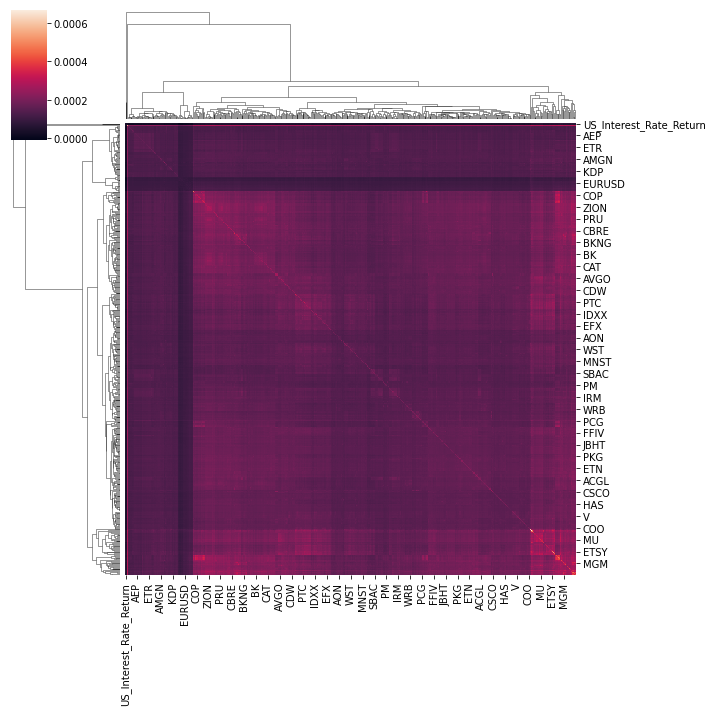

In [33]:

sns.clustermap(cov)


In [34]:
pca = PCA()
pca.fit(cov)
pd.Series(pca.explained_variance_ratio_).to_frame('Explained Variance').head().style.format('{:,.2%}'.format)

,Explained Variance
0,82.12%
1,9.35%
2,2.97%
3,1.56%
4,0.78%


In [42]:
top4 = pd.DataFrame(pca.components_[:4], columns=cov.columns)
eigen_portfolios = top4.div(top4.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range(1, 5)]

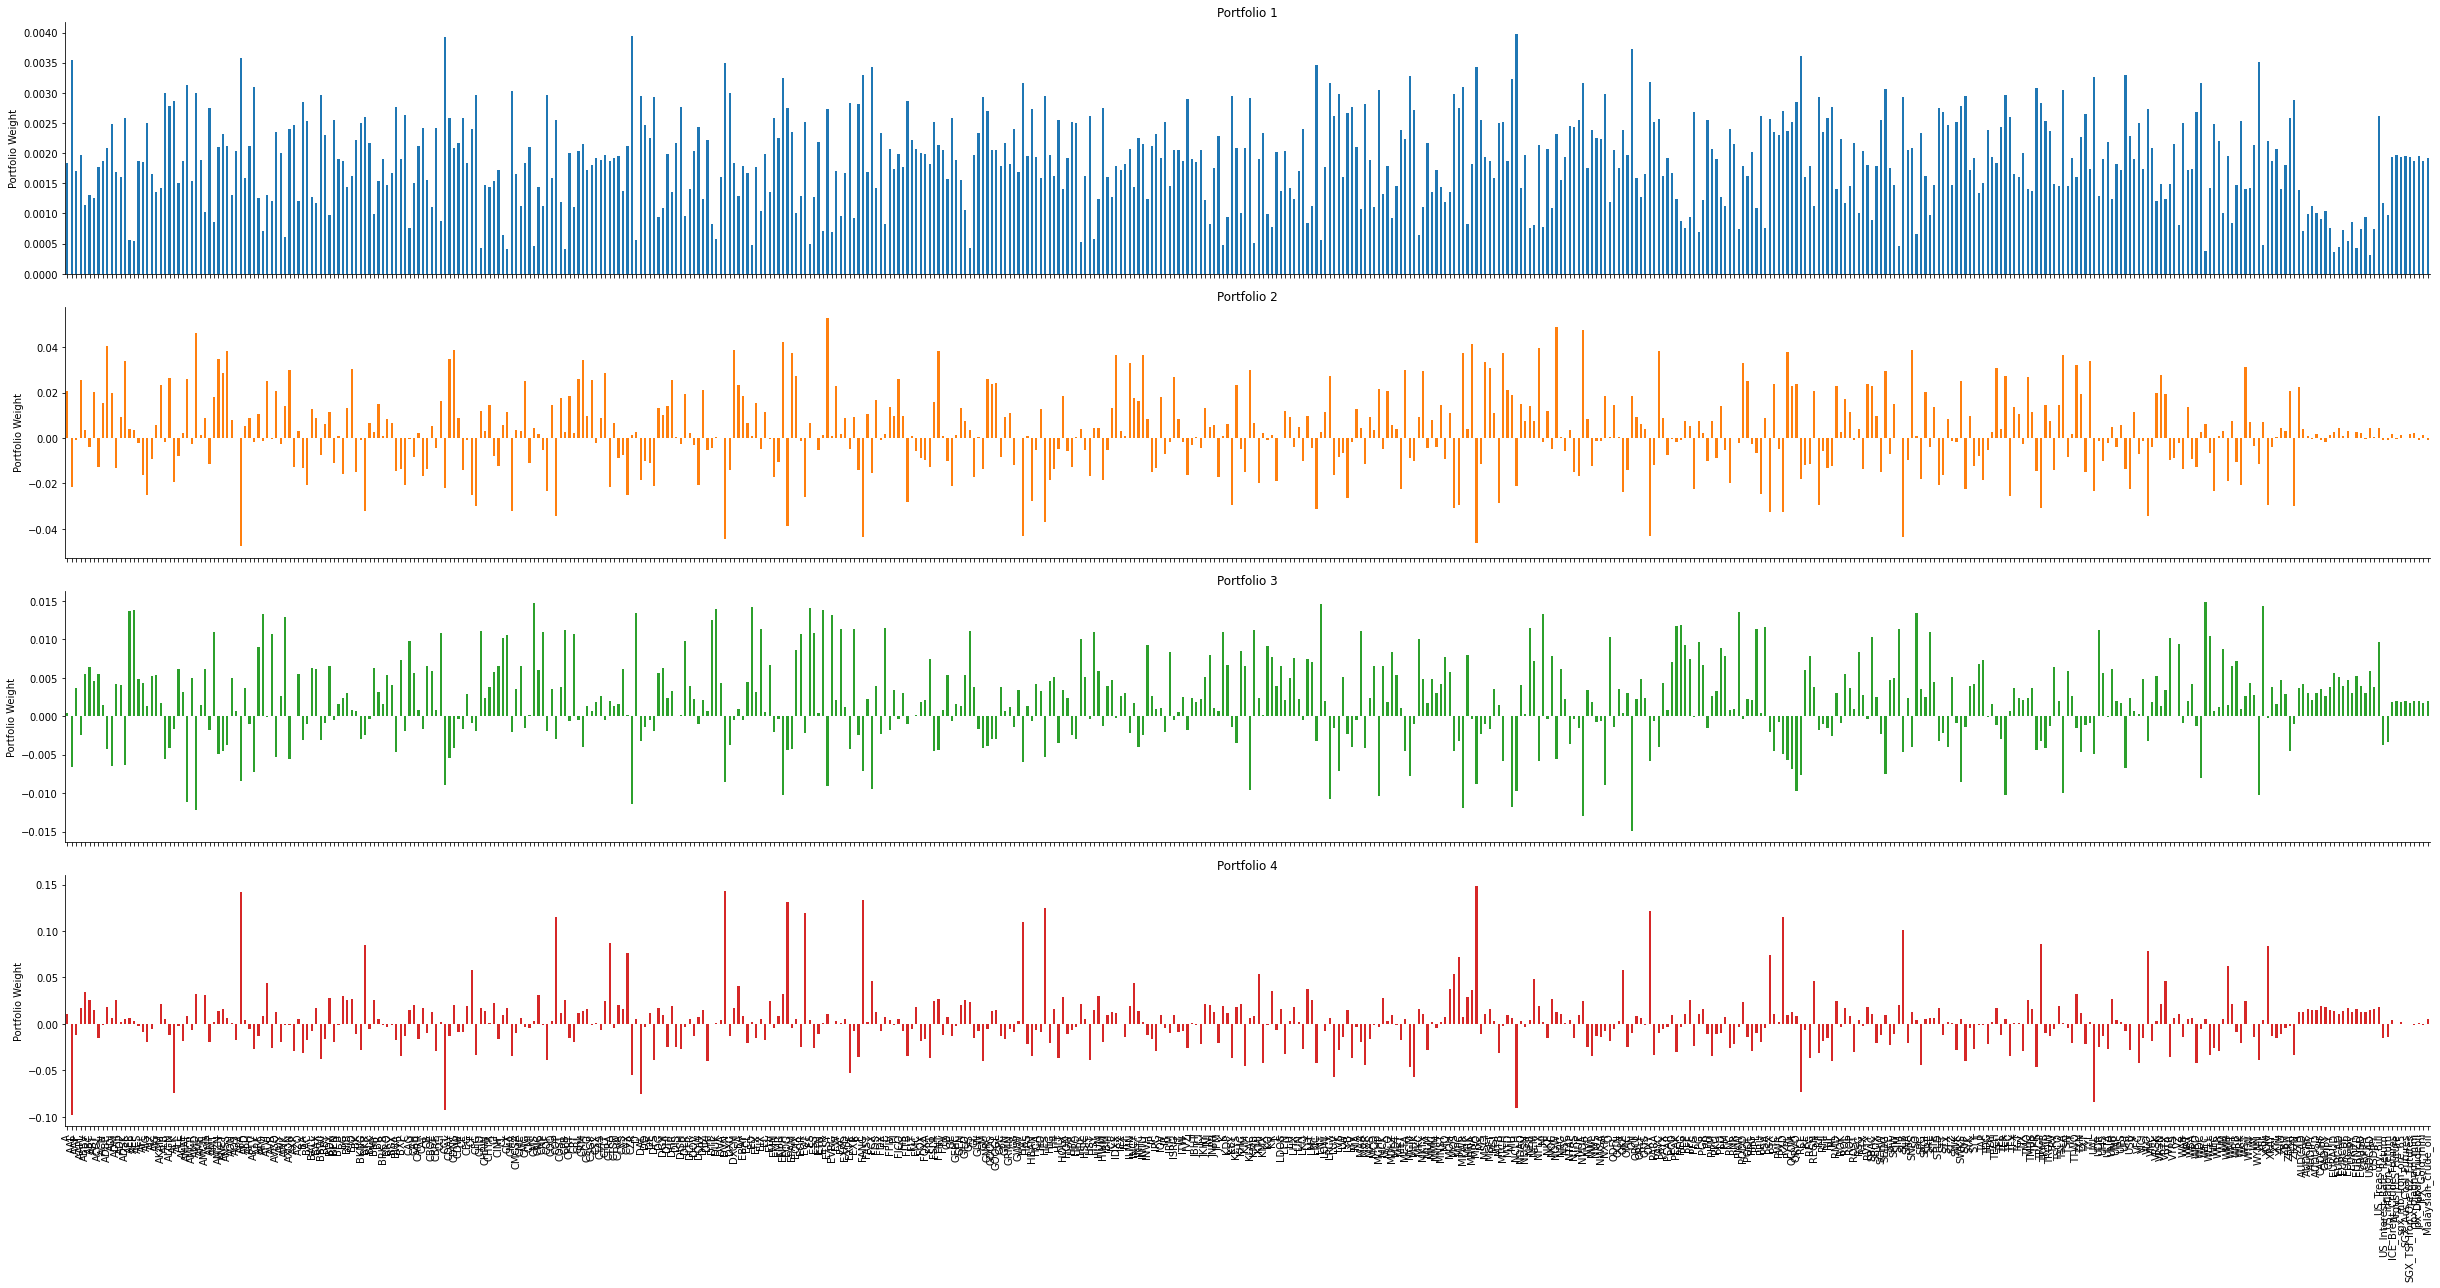

In [40]:
axes = eigen_portfolios.T.plot.bar(subplots=True,
                                   layout=(4, 1),
                                   figsize=(34, 18),
                                   legend=False)
for ax in axes.flatten():
    ax.set_ylabel('Portfolio Weight')
    ax.set_xlabel('')
sns.despine()
plt.tight_layout()

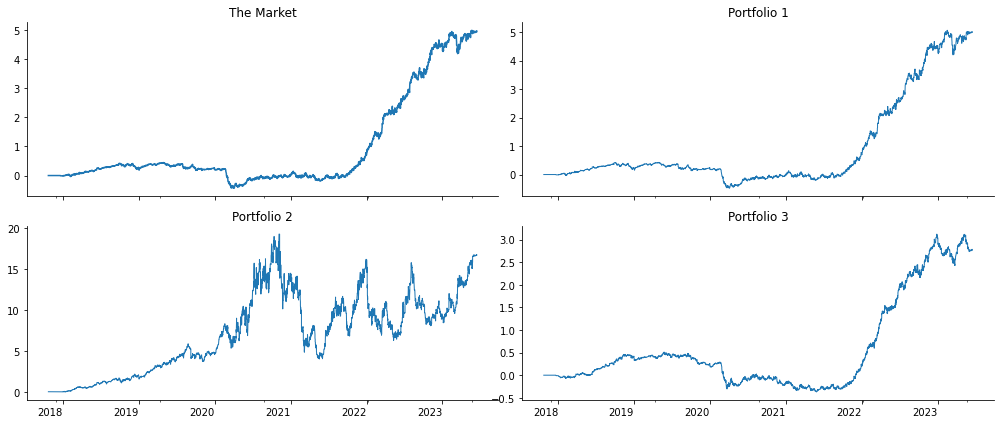

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6), sharex=True)
axes = axes.flatten()
returns.mean(1).add(1).cumprod().sub(1).plot(title='The Market', ax=axes[0])
for i in range(3):
    rc = returns.mul(eigen_portfolios.iloc[i]).sum(1).add(1).cumprod().sub(1)
    rc.plot(title=f'Portfolio {i+1}', ax=axes[i+1], lw=1, rot=0)

for i in range(4):
    axes[i].set_xlabel('')
sns.despine()
fig.tight_layout()

In [20]:

import datetime
train_end = datetime.datetime(2021, 3, 26) 

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = returns[returns.index <= train_end].copy()
df_test = returns[returns.index > train_end].copy()

# df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
# df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (2366, 532)
Test dataset: (1622, 532)


In [21]:
# Computing for normalized returns
cov_matrix = df_train.cov()
pca = PCA()
pca.fit(cov_matrix)

cov_df = pd.DataFrame({'Variance': np.diag(cov_matrix)}, index=df_train.columns)    
# cumulative variance explained
var_threshold = 0.9
var_explained = np.cumsum(pca.explained_variance_ratio_)
num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

2 components explain 90.00% of variance


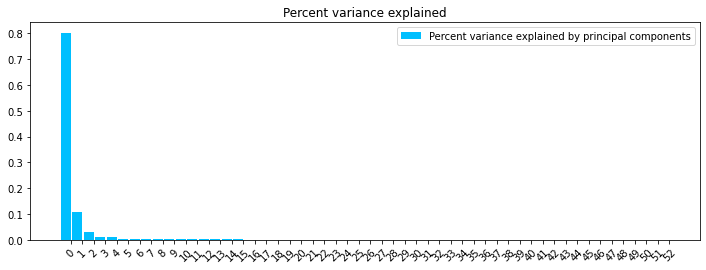

In [22]:
bar_width = 0.9
n_asset = int((1 / 10) * returns.shape[1])
x_indx = np.arange(n_asset)
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
# Eigenvalues are measured as percentage of explained variance.
rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
ax.set_xticks(x_indx + bar_width / 2)
ax.set_xticklabels(list(range(n_asset)), rotation=45)
ax.set_title('Percent variance explained')
ax.legend((rects[0],), ('Percent variance explained by principal components',))

In [23]:
pca_components = 31
pca = PCA(n_components=pca_components)
pca.fit(returns)

PCA(n_components=31)

In [24]:
print('Time varying market factors loadings of dates')
risk_factors = pd.DataFrame(pca.fit_transform(returns), 
                            columns=[f'Principal Component {i+1}' for i in range(pca_components)], 
                            index=returns.index)
risk_factors.head()

Time varying market factors loadings of dates


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31
2017-10-24,-0.012160,0.001597,0.000530,-0.001046,0.000353,0.000604,0.000027,-0.000482,-0.000366,0.001000,...,0.000443,0.000059,-0.000019,-0.000188,0.000257,-0.000128,0.000286,0.000053,-0.000212,-0.000131
2017-12-21,-0.012160,0.001597,0.000530,-0.001046,0.000353,0.000604,0.000027,-0.000482,-0.000366,0.001000,...,0.000443,0.000059,-0.000019,-0.000188,0.000257,-0.000128,0.000286,0.000053,-0.000212,-0.000131
2017-12-22,-0.252588,0.017382,-0.018195,-0.003262,-0.001243,-0.003886,0.001906,-0.000259,0.001140,0.003115,...,0.000464,0.000358,0.000074,-0.000477,-0.000289,-0.000577,0.000752,0.000028,-0.000321,-0.000240
2017-12-29,-0.012160,0.001597,0.000530,-0.001046,0.000353,0.000604,0.000027,-0.000482,-0.000366,0.001000,...,0.000443,0.000059,-0.000019,-0.000188,0.000257,-0.000128,0.000286,0.000053,-0.000212,-0.000131
2018-01-01,-0.012160,0.001597,0.000530,-0.001046,0.000353,0.000604,0.000027,-0.000482,-0.000366,0.001000,...,0.000443,0.000059,-0.000019,-0.000188,0.000257,-0.000128,0.000286,0.000053,-0.000212,-0.000131


In [25]:
risk_factors.cov()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31
Principal Component 1,8.603375e-02,-2.617531e-18,5.952099e-19,-9.049974e-19,6.230559e-19,-1.044228e-18,9.328435e-19,-3.445952e-19,-1.016382e-18,2.450455e-18,...,2.488743e-19,2.854223e-19,5.360370e-19,1.340092e-19,2.784608e-19,-7.396614e-19,-8.562668e-19,-5.116716e-19,-1.509779e-19,-3.341529e-19
Principal Component 2,-2.617531e-18,4.195144e-03,2.255532e-18,-4.046383e-19,5.360370e-19,-1.096439e-19,-7.100749e-19,9.989780e-19,1.775187e-19,-3.480759e-21,...,-2.140667e-19,-3.445952e-19,-1.222617e-19,1.767573e-19,2.784608e-20,-1.392304e-19,7.788199e-20,-1.740380e-21,2.393022e-20,-2.819415e-19
Principal Component 3,5.952099e-19,2.255532e-18,3.326073e-03,1.148651e-18,8.440842e-19,-1.670003e-18,-3.115280e-19,4.960082e-19,-7.331350e-19,-1.862206e-19,...,-1.305285e-19,-2.738923e-19,1.253073e-19,6.134838e-20,8.701899e-22,-2.253792e-19,-6.569933e-20,6.613443e-20,-2.600780e-19,-2.175475e-20
Principal Component 4,-9.049974e-19,-4.046383e-19,1.148651e-18,1.607476e-03,-5.743253e-20,-4.524987e-20,1.305285e-19,-1.057281e-19,1.670765e-19,-3.515567e-19,...,1.122545e-19,5.395177e-20,-1.103510e-19,2.349513e-19,-1.714274e-19,-1.692519e-19,1.035526e-19,1.148651e-19,4.503232e-20,4.220421e-20
Principal Component 5,6.230559e-19,5.360370e-19,8.440842e-19,-5.743253e-20,1.129524e-03,4.290580e-19,1.566342e-20,4.829554e-20,2.728045e-19,-2.218984e-20,...,1.696870e-20,1.011596e-20,3.654797e-20,1.179107e-19,3.176193e-20,5.482196e-20,-1.139949e-19,3.785326e-20,-4.372704e-20,-1.533710e-20
Principal Component 6,-1.044228e-18,-1.096439e-19,-1.670003e-18,-4.524987e-20,4.290580e-19,7.536360e-04,-5.260298e-19,3.565603e-19,2.271196e-19,-1.516306e-19,...,5.221139e-21,-5.482196e-20,-2.414777e-20,3.491637e-20,-1.516306e-19,8.266804e-20,1.000718e-19,1.571780e-20,1.026824e-19,-3.371986e-20
Principal Component 7,9.328435e-19,-7.100749e-19,-3.115280e-19,1.305285e-19,1.566342e-20,-5.260298e-19,7.391683e-04,1.044228e-19,1.253073e-19,-2.610570e-20,...,-1.018122e-19,-5.199384e-20,-2.007963e-19,-2.242914e-19,2.300564e-20,1.702989e-20,-9.659107e-20,-1.105141e-19,-4.758851e-20,9.572088e-21
Principal Component 8,-3.445952e-19,9.989780e-19,4.960082e-19,-1.057281e-19,4.829554e-20,3.565603e-19,1.044228e-19,6.621869e-04,-4.224772e-19,1.478235e-19,...,9.767881e-20,1.840180e-19,-9.398050e-20,5.177630e-20,-4.786044e-20,-1.514130e-19,-6.072294e-20,-7.657671e-20,2.175475e-21,-9.136993e-21
Principal Component 9,-1.016382e-18,1.775187e-19,-7.331350e-19,1.670765e-19,2.728045e-19,2.271196e-19,1.253073e-19,-4.224772e-19,5.903417e-04,1.809995e-19,...,-5.895536e-20,-5.656234e-20,-1.135598e-19,-7.309595e-20,-3.197948e-20,-6.743971e-21,-5.308158e-20,1.392304e-19,-1.229143e-20,6.488353e-20
Principal Component 10,2.450455e-18,-3.480759e-21,-1.862206e-19,-3.515567e-19,-2.218984e-20,-1.516306e-19,-2.610570e-20,1.478235e-19,1.809995e-19,5.430260e-04,...,-1.823048e-19,2.393022e-20,2.349513e-20,8.353823e-20,3.350231e-20,7.570652e-20,-3.741816e-20,-9.920164e-20,1.870908e-20,8.527861e-20


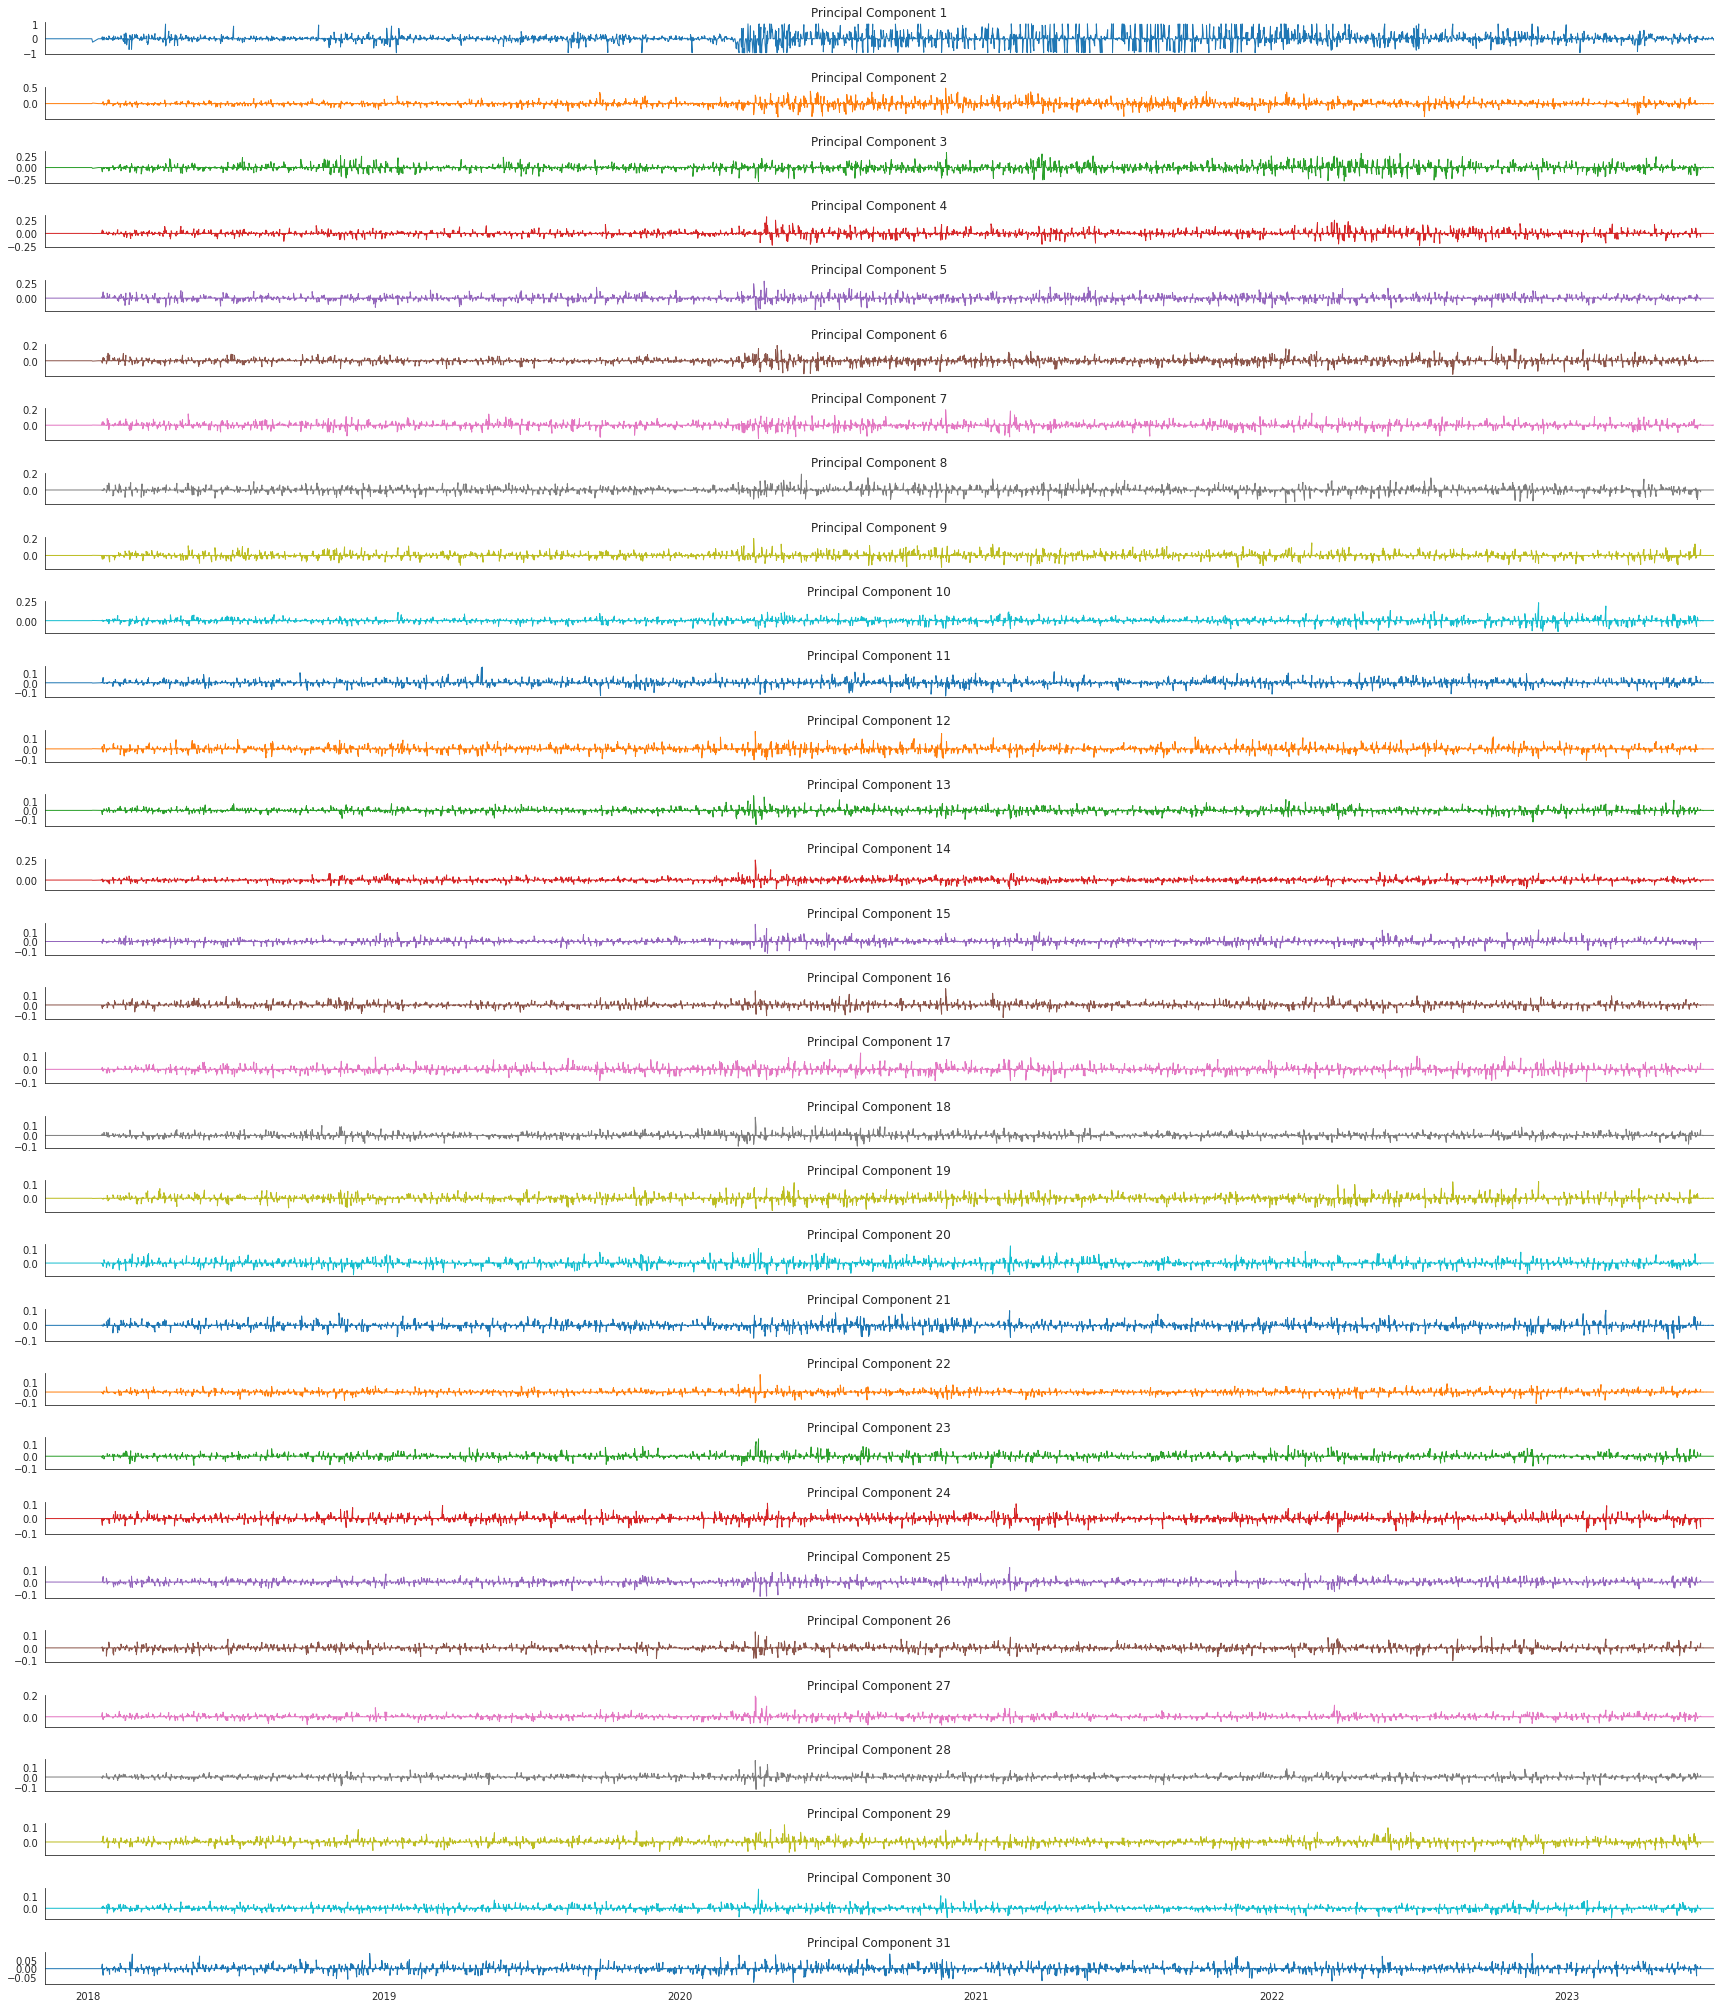

In [27]:
with sns.axes_style('white'):
    risk_factors.plot(subplots=True,
                      figsize=(24, 28),
                      title=risk_factors.columns.tolist(),
                      legend=False,
                      rot=0,
                      lw=1,
                      xlim=(risk_factors.index.min(),
                            risk_factors.index.max()))

    sns.despine()
    plt.tight_layout()

In [272]:
pca.explained_variance_ratio_

array([0.69483614, 0.03388133, 0.02686243, 0.01298249, 0.0091224 ,
       0.00608661, 0.00596976, 0.00534803, 0.00476779, 0.00438565,
       0.00376423, 0.00331872, 0.00312088, 0.00289741, 0.00266266,
       0.00256375, 0.00249714, 0.00226727, 0.00223802, 0.00207885,
       0.00200139, 0.00190525, 0.00187217, 0.00186326, 0.0017955 ,
       0.00170334, 0.00164549, 0.00161446, 0.00160258, 0.00156511,
       0.00150969])

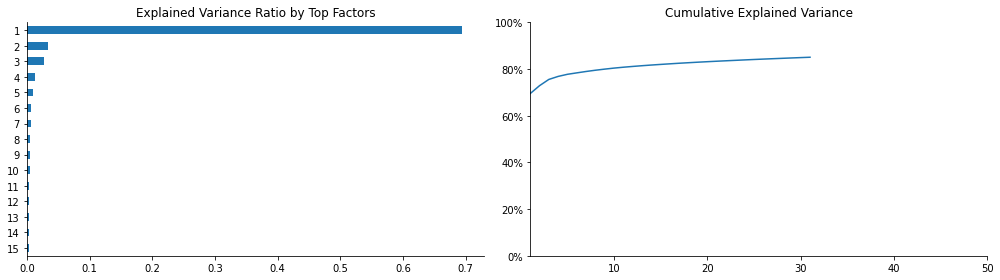

In [273]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
title = 'Explained Variance Ratio by Top Factors'
var_expl = pd.Series(pca.explained_variance_ratio_)
var_expl.index += 1
var_expl.iloc[:15].sort_values().plot.barh(title=title,
                                           ax=axes[0])
var_expl.cumsum().plot(ylim=(0, 1),
                       ax=axes[1],
                       title='Cumulative Explained Variance',
                       xlim=(1, 50))
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
sns.despine()
fig.tight_layout()

In [274]:
returns.T.head()

,2017-10-24,2017-12-21,2017-12-22,2017-12-29,2018-01-01,2018-01-01,2018-01-02,2018-01-02,2018-01-03,2018-01-03,...,2023-06-11,2023-06-11,2023-06-12,2023-06-12,2023-06-13,2023-06-13,2023-06-14,2023-06-14,2023-06-15,2023-06-15
A,0.0,0.0,-0.010513,0.0,0.0,0.0,0.0,0.0,0.025444,-0.003643,...,0.0,0.0,0.000645,0.0,0.0,0.005148,0.0,0.000634,0.0,-0.004451
AAL,0.0,0.0,-0.010513,0.0,0.0,0.0,0.0,0.0,-0.012266,-0.003643,...,0.0,0.0,0.000645,0.0,0.0,0.005148,0.0,0.000634,0.0,-0.004451
AAP,0.0,0.0,-0.010513,0.0,0.0,0.0,0.0,0.0,0.009049,-0.003643,...,0.0,0.0,0.000645,0.0,0.0,0.005148,0.0,0.000634,0.0,-0.004451
AAPL,0.0,0.0,-0.010513,0.0,0.0,0.0,0.0,0.0,-0.000174,-0.003643,...,0.0,0.0,0.000645,0.0,0.0,0.005148,0.0,0.000634,0.0,-0.004451
ABBV,0.0,0.0,-0.010513,0.0,0.0,0.0,0.0,0.0,0.015649,-0.003643,...,0.0,0.0,0.000645,0.0,0.0,0.005148,0.0,0.000634,0.0,-0.004451


In [275]:
print('Time invarying industry factors')
stock_factors = pd.DataFrame(pca.fit_transform(returns.transpose()), 
                            columns=[f'Principal Component {i+1}' for i in range(pca_components)], 
                            index=returns.columns)
stock_factors.head()

Time invarying industry factors


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31
A,-0.074675,0.171989,0.035116,-0.066313,-0.051856,-0.070211,0.047749,-0.015745,-0.017600,0.068789,...,-0.007003,-0.010793,-0.027131,0.034821,-0.008702,0.057958,-0.037066,-0.004802,0.059579,-0.002585
AAL,0.453657,-0.007651,-0.320799,0.173171,0.256848,0.034403,-0.048662,0.000835,0.036060,0.116308,...,0.031972,-0.042032,0.071197,-0.041699,-0.051551,0.059832,-0.011149,-0.015079,-0.021303,0.034283
AAP,-0.030693,-0.048922,-0.053680,-0.045945,0.045522,0.062821,0.117979,-0.023989,-0.060915,-0.023664,...,-0.055765,0.003831,-0.032191,0.002399,-0.022106,-0.007897,0.007023,-0.116530,-0.039096,0.049869
AAPL,-0.055151,0.243244,0.069157,-0.013644,0.034068,0.010059,-0.088763,-0.008076,-0.008738,-0.022596,...,0.030130,-0.018280,0.010744,0.024235,-0.028648,0.002248,-0.034185,0.049865,0.042728,-0.031683
ABBV,-0.167479,-0.072181,0.109082,-0.063628,0.076473,-0.071629,0.007887,0.006718,-0.026679,0.108915,...,0.005208,0.007794,-0.054096,0.027530,-0.052073,0.005641,-0.025301,-0.039136,0.044592,-0.024348


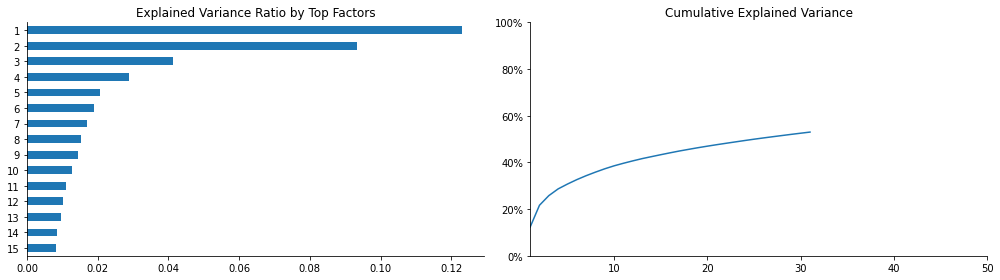

In [276]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
title = 'Explained Variance Ratio by Top Factors'
var_expl = pd.Series(pca.explained_variance_ratio_)
var_expl.index += 1
var_expl.iloc[:15].sort_values().plot.barh(title=title,
                                           ax=axes[0])
var_expl.cumsum().plot(ylim=(0, 1),
                       ax=axes[1],
                       title='Cumulative Explained Variance',
                       xlim=(1, 50))
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
sns.despine()
fig.tight_layout()

In [277]:
pca = PCA()
n_trials, n_samples = 100, 500
explained = np.empty(shape=(n_trials, n_samples))
for trial in range(n_trials):
    returns_sample = returns.sample(n=n_samples)
    returns_sample = returns_sample.dropna(thresh=int(returns_sample.shape[0] * .95), axis=1)
    returns_sample = returns_sample.dropna(thresh=int(returns_sample.shape[1] * .95))
    daily_avg = returns_sample.mean(1)
    returns_sample = returns_sample.apply(lambda x: x.fillna(daily_avg))
    pca.fit(returns_sample)
    explained[trial, :len(pca.components_)] = pca.explained_variance_ratio_

In [278]:
explained = pd.DataFrame(explained, columns=list(range(1, explained.shape[1] + 1)))
explained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 500 entries, 1 to 500
dtypes: float64(500)
memory usage: 390.8 KB


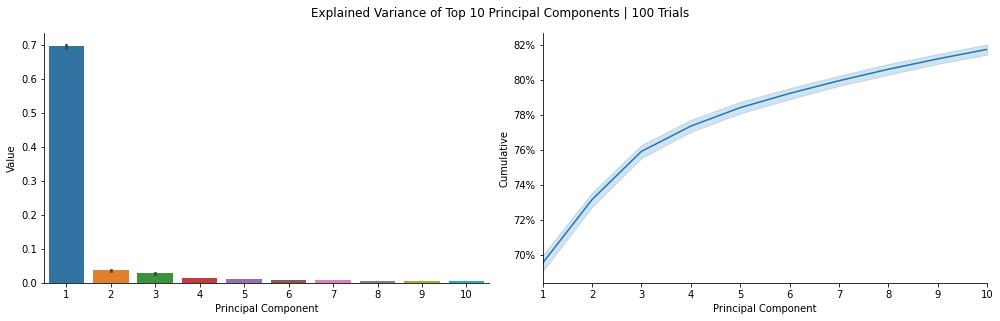

In [279]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4.5))
pc10 = explained.iloc[:, :10].stack().reset_index()
pc10.columns = ['Trial', 'Principal Component', 'Value']

pc10['Cumulative'] = pc10.groupby('Trial').Value.transform(np.cumsum)
sns.barplot(x='Principal Component', y='Value', data=pc10, ax=axes[0])
sns.lineplot(x='Principal Component', y='Cumulative', data=pc10, ax=axes[1])
axes[1].set_xlim(1, 10)
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
fig.suptitle('Explained Variance of Top 10 Principal Components | 100 Trials')
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.90)

In [280]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(returns)

In [281]:
pca = PCA(n_components=10)
loadings = pca.fit_transform(returns)

In [282]:
pca.explained_variance_

array([0.08603375, 0.00419514, 0.00332607, 0.00160748, 0.00112952,
       0.00075364, 0.00073917, 0.00066219, 0.00059034, 0.000543  ])

Sum of weights of first eigen-portfolio: 1.00


<AxesSubplot:title={'center':'First eigen-portfolio weights'}>

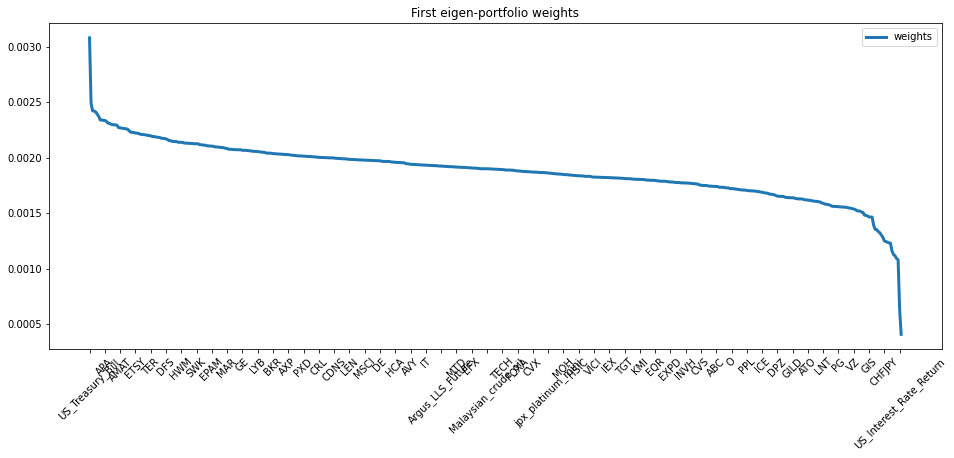

In [283]:
# getting the principal components of fitted pca model

pcs = pca.components_
normalized_pcs = list()

# normalized to put in the form of portfolio weights
for eigen_vector in pcs:
    # scaling  values to sum to 1 
    normalized_values = eigen_vector / eigen_vector.sum()
    normalized_pcs.append(normalized_values)

    
pc_w = normalized_pcs[0]

eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()}, index = returns.columns)
eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
eigen_prtf1.plot(title='First eigen-portfolio weights', 
                 figsize=(16,6), 
                 xticks=range(0, len(returns.columns),10), 
                 rot=45, 
                     linewidth=3)

In [284]:
pcs.shape

(10, 532)

Sum of weights of second eigen-portfolio: 1.00


<AxesSubplot:title={'center':'Second eigen-portfolio weights'}>

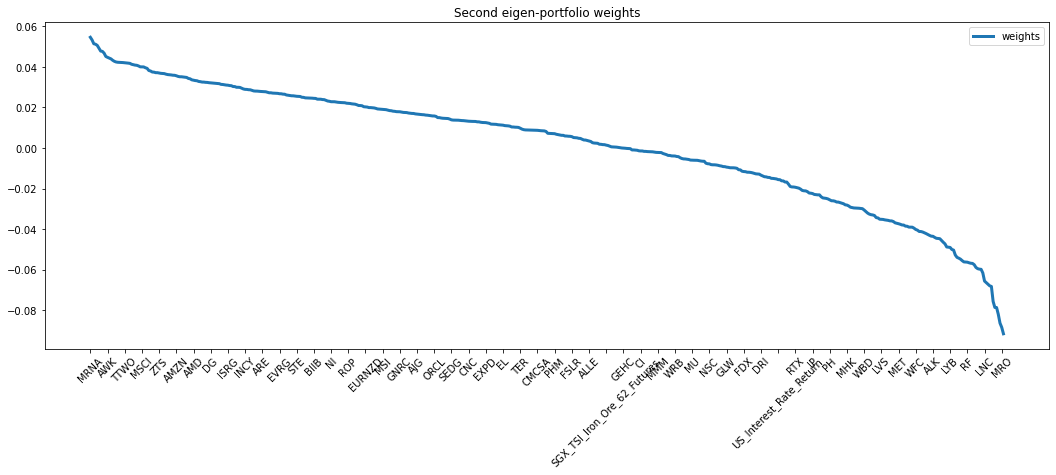

In [285]:
# Computing weights for second eigenportfolio
pc_w_2 = normalized_pcs[1]
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w_2.squeeze()}, index = returns.columns)


eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
eigen_prtf2.plot(title='Second eigen-portfolio weights',
                 figsize=(18,6), 
                 xticks=range(0, len(returns.columns),10), 
                 rot=45, 
                 linewidth=3)

### Clustering 

In [2]:
sector_df = pd.read_csv('/home/mehedi/Documents/PCA/Data/snp_cluster.csv',index_col=0)

In [3]:
sector_df

,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0
...,...,...,...,...
YUM,"Yum! Brands, Inc.",Consumer Cyclical,38100234240,2
ZBH,"Zimmer Biomet Holdings, Inc.",Healthcare,30012651520,0
ZBRA,Zebra Technologies Corporation,Technology,14082058240,3
ZION,"Zions Bancorporation, National Association",Financial Services,4103878400,4


In [12]:
forex_df=Forex

In [14]:
sector = {}
for pair in forex_df.columns:
    sector[pair]={
        'Name':pair,
        'Sector': 'Forex',
        'Capitalization': 10**8,
        'SectorCode':11
    }
df = pd.DataFrame.from_dict(sector, orient='index')    
sector_df = pd.concat([sector_df,df],axis=0)
sector_df.head()

,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0


In [16]:
macro_df=pd.read_csv('/home/mehedi/Documents/PCA/Data/macro var/Macro_variable_return.csv',index_col=0)

In [17]:
sector = {}
for i,macro in enumerate(macro_df.columns):
    sector[macro]={
        'Name':macro,
        'Sector': macro,
        'Capitalization': 10**8,
        'SectorCode':18+i
    }
df = pd.DataFrame.from_dict(sector, orient='index')    
sector_df = pd.concat([sector_df,df],axis=0)
sector_df.head()

,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0


In [19]:
commodity_df=pd.read_csv('/home/mehedi/Documents/PCA/Data/Commodity Futures/commodities.csv',index_col=0)

In [20]:
sector = {}
for i,commodity in enumerate(commodity_df.columns):
    sector[commodity]={
        'Name':commodity,
        'Sector': commodity,
        'Capitalization': 10**8,
        'SectorCode':i+12
    }
df = pd.DataFrame.from_dict(sector, orient='index')    
sector_df = pd.concat([sector_df,df],axis=0)
sector_df.head()

,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0


In [21]:
sector_df

,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0
...,...,...,...,...
SGX_TSI_Iron_Ore_62_Futures,SGX_TSI_Iron_Ore_62_Futures,SGX_TSI_Iron_Ore_62_Futures,100000000,16
jpx_platinum_mini,jpx_platinum_mini,jpx_platinum_mini,100000000,17
Jpx_Dubai_Crudeoil,Jpx_Dubai_Crudeoil,Jpx_Dubai_Crudeoil,100000000,18
JPX_Gold_mini,JPX_Gold_mini,JPX_Gold_mini,100000000,19


In [23]:
sector_df.to_csv('/home/mehedi/Documents/PCA/Data/sector_df.csv',index=True)